In [1]:
# Data Manipulation Libraries
import pickle
import pandas as pd
import numpy as np
from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
import math
from collections import Counter
from os import listdir
import os, codecs, string, random
from numpy.random import randint

#Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, date, time
from dateutil.parser import parse
from pandas.plotting import scatter_matrix
from tqdm.notebook import tqdm

# # Web parsing Libraries
# import requests
# from bs4 import BeautifulSoup

# # Big Data Libraries
# import findspark
# findspark.init()
# import pyspark
# from pyspark.sql import SparkSession
# from pyspark.sql import *
# from pyspark.sql.functions import *
# from pyspark import SparkContext

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine
from scipy.spatial.distance import jaccard
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV

# NLP Libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from gensim.models.phrases import Phrases
import re

# Statistics
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
from scipy.stats import kstest
from scipy.stats import pearsonr
from sklearn.feature_selection import mutual_info_classif
import itertools

# # Graphs
# import networkx as nx
# from operator import itemgetter
# from community import community_louvain
# import collections
# from networkx.algorithms.community.centrality import girvan_newman

#### 

In [2]:
from string import punctuation

EXCLUDE_CHARS = set(punctuation).union(set('’'))
def simple_tokeniser(text):
    return text.split()

# The Significant Bang Theory

Attention, ADA students!

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: **sometimes, we can neither prove a claim, nor disprove it!**

## Deadline
Wednesday, January 30th, 2019; 11:15 A.M. (Swiss time)

_For the deadline for extramural exams, see the submission subsection._

## Important notes
* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* Fully read the instructions for each question before starting to solve it to avoid misunderstandings, and remember to save your notebook often!
* The exam contains **15 questions organised into 4 tasks**, and is designed for more than 3 hours. **You do not need to solve everything in order to get a 6**, and you have some freedom is choosing the tasks you wish to solve.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will be monitoring the network for unusual activity.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Your file has to be named as "NameSurname_SCIPER.ipynb".
* Make sure you upload your Jupyter Notebook (1 file) to [this](https://goo.gl/forms/7GLvYl94uSOn54jH2) Google form at the end of the exam, with all the cells already evaluated (except for the Spark-related question, Q7). You need to sign in to Google using your EPFL credentials in order to submit the form.
* In case of problems with the form, send your Jupyter Notebook (along with your name and SCIPER number) as a direct message to @ramtin on Mattermost. This is reserved only for those who encounter problems with the submission -- you need to have a reasonable justification for using this back-up.
* You will have until 11:20 (strict deadline) to turn in your submission. **Late submissions will not be accepted.** This deadline is for the students taking the exam at EPFL -- students taking the exam extramurally will have their submission deadline as the starting time of the exam plus 3 hours and 5 minutes.

## Task A: Picking up the shovel (10 points)

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. (5 points) Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

Make a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself.

In [3]:
">> Series 01 Episode 01 – Pilot Episode"[10:12]

'01'

In [4]:
data_folder = './data/'
lines = open(data_folder+'all_scripts.txt', 'r')
char = ''
scene = ''
episode = ''
season = ''
df = []
for line in lines:
    if line.startswith('>> '):
        season = int(line[10:12])
        episode = int(line[21:23])
    elif line.startswith('> '):
        scene = line[2:]
    else:
        character, line = line.split(':', 1)
        df.append([line.strip(),character,scene.strip(),episode,season])

In [5]:
df = pd.DataFrame(df, columns=['Line', 'Character', 'Scene', 'Episode', 'Season'])
df

,Line,Character,Scene,Episode,Season
0,So if a photon is directed through a plane wit...,Sheldon,A corridor at a sperm bank.,1,1
1,"Agreed, what’s your point?",Leonard,A corridor at a sperm bank.,1,1
2,"There’s no point, I just think it’s a good ide...",Sheldon,A corridor at a sperm bank.,1,1
3,Excuse me?,Leonard,A corridor at a sperm bank.,1,1
4,Hang on.,Receptionist,A corridor at a sperm bank.,1,1
...,...,...,...,...,...
51287,"Mmm. No big deal, I enjoy spending time with you.",Ramona,Sheldon’s office.,24,10
51288,"And I with you. Question, are you seeking a ro...",Sheldon,Sheldon’s office.,24,10
51289,What if I were?,Ramona,Sheldon’s office.,24,10
51290,"Well, that would raise a number of problems. W...",Sheldon,Sheldon’s office.,24,10


Count the scenes in seasons

In [6]:
df.groupby('Season').nunique()

,Line,Character,Scene,Episode
Season,,,,
1,3831,34,139,17
2,4825,34,159,23
3,4704,44,124,23
4,5172,46,131,24
5,4559,52,134,24
6,4551,41,127,24
7,4894,47,114,24
8,4870,44,107,24
9,5055,46,89,24


**Q2**. (5 points) Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

_Hint: "I know all the recurrent characters because I've watched the entire series five times" is not an acceptable argument, so you need to actually generate the list._

In [7]:
df.groupby('Character').nunique()[(df.groupby('Character').nunique().Line>90) & (df.groupby('Character').nunique().Episode>1)]

,Line,Scene,Episode,Season
Character,,,,
Amy,3219,187,24,8
Arthur,129,9,3,3
Bernadette,2514,166,24,8
Bert,93,10,6,2
Beverley,159,12,5,4
Emily,159,24,14,4
Howard,5517,393,24,10
Kripke,106,16,8,5
Leonard,8770,534,24,10


In [8]:
rec_characters = list(df.groupby('Character').nunique()[(df.groupby('Character').nunique().Line>90) & (df.groupby('Character').nunique().Episode>1)].index)

In [9]:
rec_characters

['Amy',
 'Arthur',
 'Bernadette',
 'Bert',
 'Beverley',
 'Emily',
 'Howard',
 'Kripke',
 'Leonard',
 'Leslie',
 'Man',
 'Mrs Cooper',
 'Mrs Wolowitz',
 'Penny',
 'Priya',
 'Raj',
 'Sheldon',
 'Stuart',
 'Wil',
 'Zack']

In [10]:
df[df.Character.isin(rec_characters)].Character.describe()

count       48451
unique         20
top       Sheldon
freq        11689
Name: Character, dtype: object

In [11]:
df = df[df.Character.isin(rec_characters)]
df

,Line,Character,Scene,Episode,Season
0,So if a photon is directed through a plane wit...,Sheldon,A corridor at a sperm bank.,1,1
1,"Agreed, what’s your point?",Leonard,A corridor at a sperm bank.,1,1
2,"There’s no point, I just think it’s a good ide...",Sheldon,A corridor at a sperm bank.,1,1
3,Excuse me?,Leonard,A corridor at a sperm bank.,1,1
5,"One across is Aegean, eight down is Nabakov, t...",Leonard,A corridor at a sperm bank.,1,1
...,...,...,...,...,...
51284,"Uh, breakfast yes, lunch no. I did have a coug...",Sheldon,Sheldon’s office.,24,10
51286,How thoughtful. Thank you.,Sheldon,Sheldon’s office.,24,10
51288,"And I with you. Question, are you seeking a ro...",Sheldon,Sheldon’s office.,24,10
51290,"Well, that would raise a number of problems. W...",Sheldon,Sheldon’s office.,24,10


## Task B: Read the ~~stats~~ scripts carefully (30 points)

### Part 1: Don't put the shovel down just yet

**Q3**. (2.5 points) From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [12]:
# from string import punctuation

# EXCLUDE_CHARS = set(punctuation).union(set('’'))

def replace_more(chars,string):
    for char in chars:
        string = string.replace(char,' ')
    return string

df.Line = df.Line.apply(lambda line: replace_more(EXCLUDE_CHARS,line).lower())
df


/var/folders/rm/7_ymgfb97mbb78p4rhq92vww0000gn/T/ipykernel_80982/2017540973.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Line = df.Line.apply(lambda line: replace_more(EXCLUDE_CHARS,line).lower())


,Line,Character,Scene,Episode,Season
0,so if a photon is directed through a plane wit...,Sheldon,A corridor at a sperm bank.,1,1
1,agreed what s your point,Leonard,A corridor at a sperm bank.,1,1
2,there s no point i just think it s a good ide...,Sheldon,A corridor at a sperm bank.,1,1
3,excuse me,Leonard,A corridor at a sperm bank.,1,1
5,one across is aegean eight down is nabakov t...,Leonard,A corridor at a sperm bank.,1,1
...,...,...,...,...,...
51284,uh breakfast yes lunch no i did have a coug...,Sheldon,Sheldon’s office.,24,10
51286,how thoughtful thank you,Sheldon,Sheldon’s office.,24,10
51288,and i with you question are you seeking a ro...,Sheldon,Sheldon’s office.,24,10
51290,well that would raise a number of problems w...,Sheldon,Sheldon’s office.,24,10


**Q4**. (5 points) For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

In [13]:
# from sklearn, Count vectorizer for bag of words features
vectorizer = CountVectorizer(min_df=5, max_df=0.4)

#initialize and specify minumum number of occurences to avoid untractable number of features
#vectorizer = CountVectorizer(min_df = 2) if we want high frequency

#create bag of words features
X = vectorizer.fit_transform(df.Line)
vectorizer.get_feature_names_out().T[-20:]


array(['younger', 'your', 'yours', 'yourself', 'yourselves', 'youth',
       'youtube', 'yum', 'yummy', 'yup', 'zachary', 'zack', 'zarnecki',
       'zero', 'zinger', 'zip', 'zombie', 'zombies', 'zone', 'zoo'],
      dtype=object)

In [14]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
X.sum(axis=1).shape

(48451, 1)

In [16]:
# Corpus frequency
X.toarray().sum(axis=0).shape

(5632,)

In [17]:
vectorizer.get_feature_names_out().shape

(5632,)

In [18]:
np.array([X.toarray().sum(axis=0),vectorizer.get_feature_names_out()]).shape

(2, 5632)

In [19]:
# get corpus frequency of each word
corpus_freq = pd.DataFrame(np.array([X.toarray().sum(axis=0),vectorizer.get_feature_names_out()]).T,columns=['freq','word'])
corpus_freq

,freq,word
0,5,00
1,33,000
2,8,10
3,9,100
4,23,11
...,...,...
5627,14,zip
5628,11,zombie
5629,12,zombies
5630,30,zone


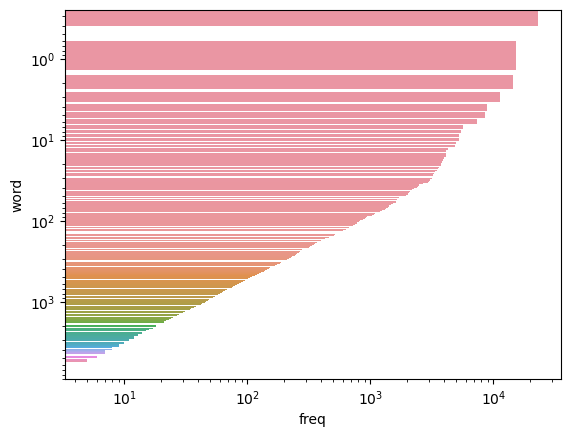

In [20]:
sns.barplot(x='freq',y='word',data=corpus_freq.sort_values('freq',ascending=False))
plt.xscale('log')
plt.yscale('log')

### Part 2: Talkativity
**Q5**. (2.5 points) For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [21]:
len('asdas asda sd sd as dasd as asd'.split())

8

In [22]:
# total words said
df.Line.str.split().str.len().sum()

592210

In [23]:
def count_words(char_df):
    return char_df.Line.str.split().str.len().sum()

# words said by character 
df.groupby('Character').apply(count_words)

Character
Amy              39933
Arthur            1451
Bernadette       27726
Bert              1146
Beverley          2029
Emily             1571
Howard           69505
Kripke            1246
Leonard         102496
Leslie            1249
Man               1253
Mrs Cooper        3389
Mrs Wolowitz      1459
Penny            79270
Priya             1940
Raj              60099
Sheldon         185388
Stuart            7955
Wil               1678
Zack              1427
dtype: int64

**Q6**. (12.5 points) For each of the recurrent characters, calculate their total number of words uttered per episode (ignoring episodes that the character does not appear in), and calculate a **robust summary statistic** for the word count distribution of each person.

In [24]:
df.groupby(['Character','Season','Episode']).apply(count_words)

Character  Season  Episode
Amy        3       23         103
           4       1          143
                   3          473
                   5          229
                   8          602
                             ... 
Zack       4       17         153
           7       9          126
                   11          17
           9       22         218
           10      22         282
Length: 1663, dtype: int64

In [25]:
df.groupby(['Character','Season','Episode']).apply(count_words)

Character  Season  Episode
Amy        3       23         103
           4       1          143
                   3          473
                   5          229
                   8          602
                             ... 
Zack       4       17         153
           7       9          126
                   11          17
           9       22         218
           10      22         282
Length: 1663, dtype: int64

In [26]:
# median words per episode of each character
df.groupby(['Character','Season','Episode']).apply(count_words).groupby('Character').median()

Character
Amy             234.0
Arthur          325.0
Bernadette      157.0
Bert            199.0
Beverley        184.0
Emily            87.0
Howard          289.0
Kripke          162.0
Leonard         397.0
Leslie          121.0
Man              11.0
Mrs Cooper      293.5
Mrs Wolowitz     39.0
Penny           323.0
Priya           145.0
Raj             219.0
Sheldon         775.0
Stuart          112.5
Wil             122.5
Zack            139.5
dtype: float64

In [27]:
pd.concat([df.groupby(['Character','Season','Episode']).apply(count_words).groupby('Character').median(), 
           df.groupby('Character').apply(count_words)],axis=1)

,0,1
Character,,
Amy,234.0,39933
Arthur,325.0,1451
Bernadette,157.0,27726
Bert,199.0,1146
Beverley,184.0,2029
Emily,87.0,1571
Howard,289.0,69505
Kripke,162.0,1246
Leonard,397.0,102496


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (2.5 points) What changes do you observe, compared to the analysis in Q5?

That some characters like Amy speak a lot because they appear in a lot of episodes, rather because they spoke a lot per episode

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (2.5 points) Why is this analysis an improvement over the previous one, and how could you improve it even further? _Hint: The improvement involves making your unit for word counts even more granular - you can go further down than episodes._

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (7.5 points) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this twice improved method is really more talkative than the second most talkative one? _Hint: Read the question again. A good idea would be to use bootstrapping and calculate your summary statistic on each bootstrapped set._

In [28]:
# median words per episode of each character
df.groupby(['Character', 'Season', 'Episode', 'Scene']
           ).apply(count_words
                   ).groupby('Character').median()

Character
Amy              65.5
Arthur          107.5
Bernadette       52.0
Bert             82.0
Beverley        107.0
Emily            34.5
Howard           64.0
Kripke           57.5
Leonard          67.0
Leslie           61.0
Man              13.0
Mrs Cooper      128.5
Mrs Wolowitz     26.0
Penny            71.0
Priya            44.0
Raj              59.0
Sheldon         117.0
Stuart           52.5
Wil              46.5
Zack             61.0
dtype: float64

It's simpson's paradox: aggregating dat can lead you to false conclusions about something.

In [29]:
pd.concat([  # median words per episode of each character
    df.groupby(['Character', 'Season', 'Episode', 'Scene']
               ).apply(count_words
                       ).groupby('Character').median(),
    df.groupby(['Character', 'Season', 'Episode']).apply(
        count_words).groupby('Character').median(),
    df.groupby('Character').apply(count_words)], axis=1).rename(columns={0:'per scene',1:'per episode',2:'total words'})


,per scene,per episode,total words
Character,,,
Amy,65.5,234.0,39933
Arthur,107.5,325.0,1451
Bernadette,52.0,157.0,27726
Bert,82.0,199.0,1146
Beverley,107.0,184.0,2029
Emily,34.5,87.0,1571
Howard,64.0,289.0,69505
Kripke,57.5,162.0,1246
Leonard,67.0,397.0,102496


### Part 3: Obligatory Spark cameo
**Q7**. (7.5 points) Write a Spark script that does the following: Given the raw input file and your list of recurrent characters, create an RDD containing (speaker, dialogue line) rows **only for the recurrent characters** (assume that you already have the list --  no need to calculate it using Spark), and then generate a vectorized bag of words representation for each dialogue line, thus generating an RDD with (speaker, bag of words vector) rows. Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.

You do not need to run this script, but you do need to use Spark logic and also, the syntax needs to be correct.

## Task C: The Gossip Graph (30 points)

**Note: Only for this task, discard the recurrent characters whose names are not single words, e.g. Mrs. Cooper.**

Let us define _gossip_ as follows: if a dialogue line of character A mentions B by name in a scene that does not involve character B, we say that “A gossips about B” in that line. Multiple mentions of the same person in a single line are counted once, but a character can gossip about several others in the same line. For the sake of simplicity, we only consider gossips where the name of the recurrent character is mentioned as it appears in our list of characters; for example, if someone says "Cooper" and they mean Sheldon, we discard that.

**Q8**. (12.5 points) Create the two following graphs first:

1. (5 points) Create the _familiarity graph_, an undirected weighted graph, in which there is a node for each recurrent character, and an edge between two characters if they appear together in at least one scene. The weight of the edge between them is the number of scenes they appear in together. If an edge exists between two people in the familiarity graph, we say that they "know each other".
2. (7.5 points) Create the _gossip graph_, which is a directed weighted graph, in which there there is a node for each recurrent character, and a directed edge from the node for A to the node for B if A has gossiped about B at least once. The weight of the edge is the number of scenes in which A has gossiped about B.

_Hint: You can create each graph first as an adjacency matrix and then create a networkx graph out of that._

Now, answer the following questions:

**Q9**. (5 points) Sheldon claims that every character in the show is familiar with everyone else through at most one intermediary. Based on the familiarity graph, is this true? If not, at most how many intermediaries are needed?

**Q10**. (5 points) Who is the character through whom the largest number of these indirect familiarities happen? Calculate an appropriate centrality metric on the familiarity graph to answer this question. You can use the package networkx for this section.

**Q11**. (2.5 points) Another claim of Sheldon's is that every recurrent character in the show gossips about all the other recurrent characters. What property of the gossip graph would correspond to this? Does the gossip graph possess that property? If not, then is it the case that for every pair of recurrent characters, at least one gossips about the other? What property would this correspond to?

**Q12**. (5 points) Use the gossip graph and the familiarity graph to figure out if for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other. Explain your method - the simpler, the better.

## Task D: The Detective's Hat (30 points)

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high. Leonard also suspects that it's easier for Sheldon to distinguish the lines that _aren't_ his, rather than those that _are_. We want you to put on the (proverbial) detective's hat and to investigate this claim.

**Q13**. (7.5 points) Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons. Each of your data points (which is one row of your matrix) is one **dialogue line**. Now, use the scikit-learn class **TfIdfVectorizer** to create TF-IDF representations for the data points in your training and test sets. Note that since you're going to train a machine learning model, everything used in the training needs to be independent of the test set. As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

In [30]:
STOPWORDS = [stp.strip() for stp in open('helpers/stopwords.txt','r').readlines()]

In [31]:
def remove_stopwords(tokens):
    return [token for token in tokens if token not in STOPWORDS]
df.Line = df.Line.apply(simple_tokeniser).apply(remove_stopwords).apply(lambda tokens: ' '.join(tokens))

/var/folders/rm/7_ymgfb97mbb78p4rhq92vww0000gn/T/ipykernel_80982/3797994344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Line = df.Line.apply(simple_tokeniser).apply(remove_stopwords).apply(lambda tokens: ' '.join(tokens))


Split train and test

In [44]:
df = df.sort_values(by='Season')

In [45]:
X_train, X_test, y_train, y_test = df[~df.Season.isin([9, 10])], df[df.Season.isin(
    [9, 10])], df.Character[~df.Season.isin([9, 10])], df.Character[df.Season.isin([9, 10])]


In [46]:
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(df.Line)
vocabulary = vectorizer.get_feature_names_out()
vocabulary

array(['00', '000', '000lb', ..., 'आज', 'घर', 'नय'], dtype=object)

In [47]:
vectorizer = TfidfVectorizer(vocabulary=vocabulary)
X_train_tf = vectorizer.fit_transform(X_train.Line)

vectorizer = TfidfVectorizer(vocabulary=vocabulary)
X_test_tf = vectorizer.fit_transform(X_test.Line)

In [48]:
[X_train_tf.toarray().shape,X_test_tf.toarray().shape, y_train.shape, y_test.shape]

[(38244, 20451), (10207, 20451), (38244,), (10207,)]

**Q14**. (5 points) Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [60]:
X_train.reset_index(drop=True).loc[X_train.reset_index(drop=True).Character=='Sheldon'].index

Int64Index([    0,     1,     2,     4,     6,     8,    10,    12,    14,
               16,
            ...
            38205, 38221, 38226, 38228, 38232, 38234, 38235, 38236, 38240,
            38241],
           dtype='int64', length=9452)

In [66]:
X_train_tf[X_train.reset_index(drop=True).loc[X_train.reset_index(drop=True).Character=='Sheldon'].index].toarray().shape

(9452, 20451)

In [111]:
words_not_by_sheldon = X_train[X_train.Character!='Sheldon'].Line.str.cat(sep = ' ').split()
words_by_sheldon = [word for word in 
                        X_train[X_train.Character=='Sheldon'].Line.str.cat(sep = ' ').split()
                        if word not in words_not_by_sheldon
                    ]   

In [112]:
len(words_by_sheldon)

7141

In [119]:
words_by_sheldon

['slits',
 'slits',
 'unobserved',
 'slits',
 'teleportation',
 'transmit',
 'reassembly',
 'transported',
 'recreated',
 'disintegrated',
 'baster',
 'labelled',
 'mucus',
 'congested',
 'keen',
 'arrival',
 'rendered',
 'collaborate',
 'schematic',
 'argon',
 'hunches',
 'guesses',
 'first…',
 'labourers',
 'vision',
 'oompah',
 'loompahs',
 'invalidated',
 'pubescent',
 'wunderkind',
 'ceases',
 'fruitless',
 'efforts',
 'donates',
 'waits',
 'asterisk',
 'cyborg',
 'excelled',
 'wolfgang',
 'amadeus',
 'mozart',
 'moss',
 'frankfurter',
 'croutons',
 'pea',
 'frankfurter',
 'croutons',
 'carrier',
 '187',
 'febrile',
 'delirium',
 'heidelberg',
 'germany',
 'visiting',
 'blitzkrieg',
 'intestine',
 'czechoslovakia',
 'clockwise',
 'mats',
 'cinderblocks',
 'housekeeper',
 'residence',
 '“möchtest',
 'darmspülung',
 '“would',
 'adoseconds',
 'resistance',
 'teamwork',
 'anthropology',
 'mammal',
 'manners',
 'salted',
 'carthage',
 'tawdry',
 'picasso',
 'noah',
 'webster',
 'jacque

In [124]:
X_test.Line.str.split(
    ).apply(lambda tokens:
            all(token in words_by_sheldon for token in tokens))


43949    False
43948    False
43947    False
43936    False
43946    False
         ...  
47704    False
47703    False
47702    False
47720    False
51291    False
Name: Line, Length: 10207, dtype: bool

In [113]:
# split each line into lists and see if the words are in the list of words said by sheldon
(X_test[
    X_test.Line.str.split(
    ).apply(lambda tokens:
            all(token in words_by_sheldon for token in tokens))
].Character == 'Sheldon'
).sum()/len(X_test)


0.005878318800822965

In [132]:
(X_test.Character == 'Sheldon')

43949    False
43948    False
43947    False
43936    False
43946    False
         ...  
47704    False
47703    False
47702     True
47720    False
51291     True
Name: Character, Length: 10207, dtype: bool

In [133]:
X_test.Line.str.split().apply(lambda tokens:
                              all(token in words_by_sheldon for token in tokens))

43949    False
43948    False
43947    False
43936    False
43946    False
         ...  
47704    False
47703    False
47702    False
47720    False
51291    False
Name: Line, Length: 10207, dtype: bool

In [134]:
(X_test.Line.str.split().apply(lambda tokens:
                              all(token in words_by_sheldon for token in tokens)) & (X_test.Character == 'Sheldon'))

43949    False
43948    False
43947    False
43936    False
43946    False
         ...  
47704    False
47703    False
47702    False
47720    False
51291    False
Length: 10207, dtype: bool

In [131]:
(X_test.Line.str.split().apply(lambda tokens:
                              all(token in words_by_sheldon for token in tokens)) == (X_test.Character == 'Sheldon'))

43949     True
43948     True
43947     True
43936     True
43946     True
         ...  
47704     True
47703     True
47702    False
47720     True
51291    False
Length: 10207, dtype: bool

In [130]:
# split each line into lists and see if the words are in the list of words said by sheldon
(X_test.Line.str.split().apply(lambda tokens:
                              all(token in words_by_sheldon for token in tokens)) == (X_test.Character == 'Sheldon')).sum()/len(X_test)

0.7438032722641325

Accuracy is pretty low

**Q15**. (17.5 points) Now, perform singular value decomposition (SVD) on the training TF-IDF matrix, and calculate a **25-dimensional approximation** for both the training and test TF-IDF matrices (you can do this using scikit-learn's **TruncatedSVD** class). Then, train a logistic regression classifier with 10-fold cross-validation (using the scikit-learn **LogisticRegressionCV** class) on the output of the SVD that given a dialogue line, tells you whether it's by Sheldon or by someone else.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (7.5 points) Report precision, recall and F1-score for both classes (Sheldon and not-Sheldon), as well as accuracy, of your classifier on the training set and the test set. You need to implement the calculation of the evaluation measures (precision, etc.) yourself -- using the scikit-learn functions for them is not allowed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (5 points) What difference do you observe between the model's scores on the training and test sets? What could you infer from the amount of difference you see? What about the difference between scores on the two classes? Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (2.5 points) List 10 of the most extreme false positives and 10 of the most extreme false negatives, in terms of the probabilities predicted by the logistic regression model. What are common features of false positives? What about the false negatives?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._